In [1]:
'''
! pip install pandas
! conda install -c conda-forge pyts

'''
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as spio


## Importing vibration data
In this stage we are going to load all the dataset for the case western reverse university dataset for bearings. Then we try to create a class that generate the image representetive of the timeseries by sliding a nonoverlaping window.

In [2]:
## In the first step we search for all the ".mat" files and try to extract them and 
## Reconstruct them into a new dataframe
## **Note**: This is assumed that all three .mat files exist in the same directory of this python file
data_root_path = '.' 
data_paths = []
for file in os.listdir(data_root_path):
    if '.mat' in file:
        data_paths.append(data_root_path+'/'+file)
print(data_paths)
num_min_samples = 1e10
whole_data = {}
for file in data_paths:   
    mat = spio.loadmat(file, squeeze_me=True) # Load the dataset
    name = file.replace('.mat','').replace('./','')  
    data = {}
    for i in range(1,len(mat)-2): 
        data[i]=mat.get('C{}'.format(i))
        print(len(data[i]))
        if num_min_samples >= len(data[i]): num_min_samples = len(data[i]) 
    whole_data[name] = data
print(f'minimum number of samples to be considered is ===> {num_min_samples}')

['./DataSetC.mat', './DataSetA.mat', './DataSetB.mat']
485643
488545
486804
486804
485643
485063
489125
487964
488545
489125
483903
487384
486224
486804
486224
381890
485063
486804
484483
489125
485063
486804
487384
487384
485643
487964
491446
486804
486804
487964
minimum number of samples to be considered is ===> 381890


## Image representation of the entire dataset
In this section we use two methods GAF and MTF for generating the image representation of the vibration dataset

In [14]:
from pyts.image import GramianAngularField

gasf = GramianAngularField(image_size=1., method='summation')
w_length = 64

sliced_data = {}
image_matrix ={}

for d_name in whole_data.keys(): # this loop goes through each dataset
    dataset = whole_data[d_name]
    sliced_data[d_name] = {}
    image_matrix[d_name] ={}
    for class_category in dataset.keys():# this loop goes through the eaech class of dataset 
        data = dataset[class_category]
        dummy = np.empty((len(data)//w_length, w_length))
        for i in range((len(data)//w_length)): # this loop goes through each class of a dataset
            dummy[i,:] = data[i*w_length: (i+1)*w_length]
        image_matrix[d_name][class_category] = gasf.transform(dummy)
        del dummy
    
    
image_matrix


{'DataSetC': {1: array([[[-0.96363177, -0.84006913, -0.47093419, ..., -0.83518025,
           -0.35481863, -0.13484848],
          [-0.84006913, -0.64003673, -0.18638843, ..., -0.96120141,
           -0.6175191 , -0.42424242],
          [-0.47093419, -0.18638843,  0.31416437, ..., -0.97421302,
           -0.92177966, -0.81060606],
          ...,
          [-0.83518025, -0.96120141, -0.97421302, ..., -0.13518825,
            0.47074669,  0.65757576],
          [-0.35481863, -0.6175191 , -0.92177966, ...,  0.47074669,
            0.8982966 ,  0.97424242],
          [-0.13484848, -0.42424242, -0.81060606, ...,  0.65757576,
            0.97424242,  1.        ]],
  
         [[-0.15890922, -0.53715405, -0.70070442, ..., -0.94147451,
           -0.93791122, -0.99346367],
          [-0.53715405, -0.8274398 , -0.92606875, ..., -0.99797467,
           -0.99858329, -0.95735988],
          [-0.70070442, -0.92606875, -0.98426817, ..., -0.96297162,
           -0.96572842, -0.87642917],
          ..

/home/brash/anaconda3/envs/RL_GAN_CWRU/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


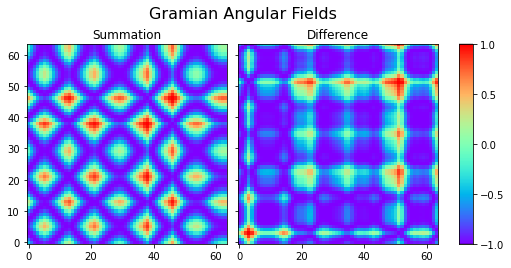

In [26]:
from mpl_toolkits.axes_grid1 import ImageGrid

AA = image_matrix['DataSetA'][2][200,:,:]
BB = image_matrix['DataSetA'][5][1900,:,:]


# Show the images for the first time series
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [AA, BB]
titles = ['Summation', 'Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
plt.show()

## synthesizing unbalanced vibration data
In this section, the entire dataset is used to generate some unbalanced dataset reference for Reinfrocement learning and GAN analysis.        
        